In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

    
import sys
from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils, further_processing_class, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis, patterns_and_features_class, compare_two_monkeys_class, monkey_landing_in_ff
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.compare_GUAT_and_TAFT import find_GUAT_or_TAFT_trials
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from reinforcement_learning.base_classes import env_utils, base_env, more_envs, rl_base_class, rl_base_utils
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_utils
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_time_series, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils
from planning_analysis.only_cur_ff import only_cur_ff_utils, only_cur_ff_class, only_cur_ff_utils
from planning_analysis.plan_factors import plan_factors_utils, build_factor_comp, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.agent_analysis import compare_monkey_and_agent_utils, agent_plan_factors_class, agent_plan_factors_x_sess_class
from planning_analysis.plan_factors import test_vs_control_utils
from planning_analysis.factors_vs_indicators import make_variations_utils, process_variations_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils, examine_null_arcs
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from machine_learning.ml_methods import ml_methods_class, prep_ml_data_utils
from decision_making_analysis.compare_GUAT_and_TAFT import GUAT_vs_TAFT_class, GUAT_vs_TAFT_utils
from pattern_discovery.learning.capture_rate_and_duration import capture_stats_by_phase, capture_stats_trend, print_fit_results
from pattern_discovery.learning.proportion_trend import analyze_proportion_trend, plot_stacked_bars_by_phase
from pattern_discovery.learning.retry_analysis import prep_retry_data
from pattern_discovery.learning import prep_learning_data

import numpy as np, pandas as pd, statsmodels.api as sm, statsmodels.formula.api as smf
from data_wrangling import specific_utils, process_monkey_information, retrieve_raw_data, time_calib_utils
from pattern_discovery import make_ff_dataframe
from scipy.stats import pearsonr

from importlib import reload
from eye_position_analysis import eye_positions
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 40

Set up logging configuration.


/opt/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# Get data

## key data

In [ ]:
all_trial_durations_df, all_stop_df, all_VBLO_df = prep_learning_data.get_key_learning_data(monkey_name='monkey_Bruno')

all_monkey_data/raw_monkey_data/monkey_Schro/data_0316
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0316/ff_dataframe.h5
Retrieved target_clust_df_short
17 out of 361 target clusters were not last seen within 10 seconds.They are filtered out when finding the trials that are "visible before last one".
7 out of 344 target were captured within 0.1 seconds from the previous capture. They are filtered out when finding the trials that are "visible before last one" because the monkey might have just captured two ff together.
5 out of 337 target clusters were seen at least 0.1 seconds before the previous capture, which is 1.48%
all_monkey_data/raw_monkey_data/monkey_Schro/data_0321
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceilin

## aggregated

In [3]:
reload(cluster_analysis)

<module 'pattern_discovery.cluster_analysis' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/cluster_analysis.py'>

In [4]:
tm = compare_two_monkeys_class.CompareTwoMonkeys()
tm.compare_monkeys(exists_ok=True)

Failed to retrieve combd_pattern_frequencies, combd_feature_statistics, combd_all_trial_features, agg_pattern_frequencies, agg_feature_statistics, and combd_scatter_around_target_df. Will make them anew.
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219
Retrieved all_trial_patterns
Retrieved pattern_frequencies
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0219/ff_dataframe.h5
Retrieved stop_category_df
Retrieved all_trial_features
Retrieved feature_statistics
Retrieved scatter_around_target_df
Successfully made df related to patterns and features for data_0219
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0220
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caug

# Pattern Frequencies (As proportion)

## GUAT and TAFT

In [5]:
# give df_monkey to chatGPT and ask for stacked bar plot of event frequencies

In [6]:
reload(analyze_proportion_trend)

<module 'pattern_discovery.learning.proportion_trend.analyze_proportion_trend' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/analyze_proportion_trend.py'>

     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.05988 0.01187 5.04639 0.00000                     1.81988   

           95% CI  
0  [1.442, 2.296]  



--- Early vs Late Results ---
phase  retry_over_miss  denom_count   p_hat    p_lo    p_hi
early              321   1614.00000 0.19888 0.18014 0.21906
 late             1478   2080.00000 0.71058 0.69071 0.72966


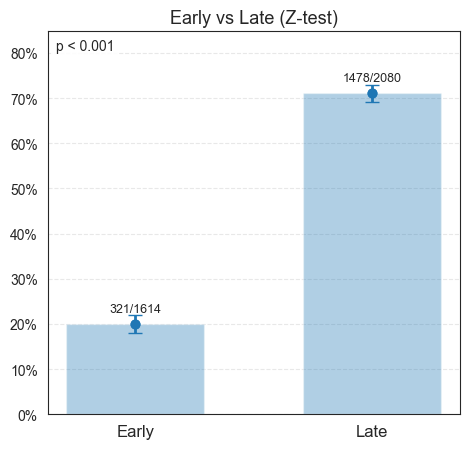

     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.06601 0.01406 4.69600 0.00000                     1.93508   

           95% CI  
0  [1.469, 2.549]  



--- Early vs Late Results ---
phase  retry_fail_over_miss  denom_count   p_hat    p_lo    p_hi
early                    78   1614.00000 0.04833 0.03889 0.05990
 late                   460   2080.00000 0.22115 0.20384 0.23949


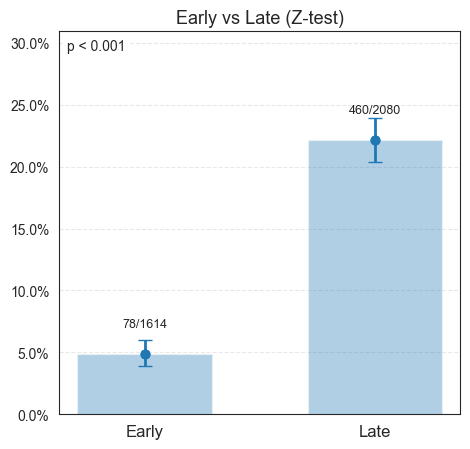

     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.05727 0.01231 4.65172 0.00000                     1.77309   

           95% CI  
0  [1.393, 2.257]  



--- Early vs Late Results ---
phase  retry_capture_over_miss  denom_count   p_hat    p_lo    p_hi
early                      243   1614.00000 0.15056 0.13394 0.16883
 late                     1018   2080.00000 0.48942 0.46798 0.51091


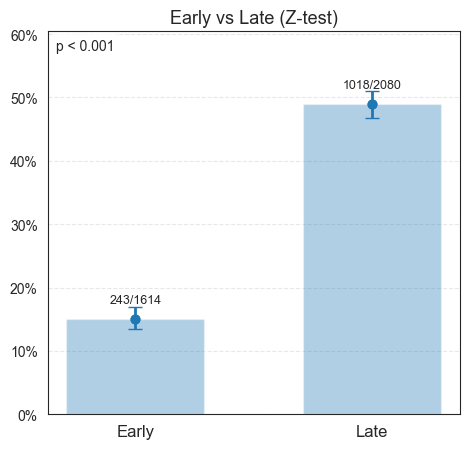

In [44]:
#monkey = 'Schro'
monkey = 'Schro'

df_monkey = tm.combd_pattern_frequencies[tm.combd_pattern_frequencies['monkey'] == monkey]
analyze_proportion_trend.show_event_proportion(df_monkey, 
                                     event='retry_over_miss',
                                     title=f"{monkey}: Retries vs. All Initial Misses",
                                     ylabel=""
                                     )

analyze_proportion_trend.show_event_proportion(df_monkey, 
                                     event='retry_fail_over_miss',
                                     title=f"{monkey}: Retry-Then-Fail vs. Initial Misses",
                                     ylabel=""
                                     )

analyze_proportion_trend.show_event_proportion(df_monkey, 
                                     event='retry_capture_over_miss',
                                     title=f"{monkey}: Retry-Then-Capture vs. Initial Misses",
                                     ylabel=""
                                     )

## Stacked bars

In [45]:

new_label_mapping = {
    # Break down attempts
    'first_shot_capture_over_attempt': 'Capture',
    'no_retry_over_attempt': 'No Retry',
    'retry_capture_over_attempt': 'Retry + Capture',
    'retry_fail_over_attempt': 'Retry + Fail',
    # Capture vs miss
    'capture_over_miss': 'Capture',
    'miss_over_attempt': 'Miss',

}

combd_pattern_frequencies = tm.combd_pattern_frequencies.copy()
combd_pattern_frequencies['new_label'] = combd_pattern_frequencies['item'].map(new_label_mapping).fillna('')

category_order = ['Capture', 'Miss']
title = 'Attempt Outcomes Across Early and Late Sessions'
y_label = 'Proportion of Attempts'
plot_stacked_bars_by_phase.plot_outcomes_by_phase_side_by_side(combd_pattern_frequencies, category_order, title, y_label,
                                             category_colors=['#0072B2', '#C76E00'])


category_order = ['Capture', 'Retry + Capture', 'Retry + Fail', 'No Retry']
title = 'Attempt Outcomes Across Early and Late Sessions'
y_label = 'Proportion of Attempts'
plot_stacked_bars_by_phase.plot_outcomes_by_phase_side_by_side(combd_pattern_frequencies, category_order, title, y_label)





/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:162: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results 

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:162: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results 

(<Figure size 2280x1080 with 2 Axes>,
 array([<Axes: title={'center': 'Bruno'}, xlabel='Session Phase', ylabel='Proportion of Attempts'>,
        <Axes: title={'center': 'Schro'}, xlabel='Session Phase'>],
       dtype=object))

In [83]:
new_label_mapping = {
    'retry_capture_over_miss': 'Retry + Capture',
    'retry_fail_over_miss': 'Retry + Fail',
    'no_retry_over_miss': 'No Retry',
}

combd_pattern_frequencies = tm.combd_pattern_frequencies.copy()
combd_pattern_frequencies['new_label'] = combd_pattern_frequencies['item'].map(new_label_mapping).fillna('')


category_order = ['Retry + Capture', 'Retry + Fail', 'No Retry']
title = 'Actions After a Miss Across Early and Late Sessions'
y_label = 'Proportion of Misses'
plot_stacked_bars_by_phase.plot_outcomes_by_phase_side_by_side(combd_pattern_frequencies, category_order, title, y_label,
                                                          category_colors = ['#CC79A7', '#E69F00', '#009E73'])


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:162: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results 

(<Figure size 2280x1080 with 2 Axes>,
 array([<Axes: title={'center': 'Bruno'}, xlabel='Session Phase', ylabel='Proportion of Misses'>,
        <Axes: title={'center': 'Schro'}, xlabel='Session Phase'>],
       dtype=object))

In [47]:

new_label_mapping = {
    'eventual_capture_over_attempt': 'Capture',
    'eventual_miss_over_attempt': 'Miss',
}

combd_pattern_frequencies = tm.combd_pattern_frequencies.copy()
combd_pattern_frequencies['new_label'] = combd_pattern_frequencies['item'].map(new_label_mapping).fillna('')

category_order = ['Capture', 'Miss']
title = 'Eventual Attempt Outcomes Across Early and Late Sessions'
y_label = 'Proportion of Attempts'
plot_stacked_bars_by_phase.plot_outcomes_by_phase_side_by_side(combd_pattern_frequencies, category_order, title, y_label,
                                                               category_colors=['#4e79a7', '#98df8a'])




/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:162: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results 

(<Figure size 2280x1080 with 2 Axes>,
 array([<Axes: title={'center': 'Bruno'}, xlabel='Session Phase', ylabel='Proportion of Attempts'>,
        <Axes: title={'center': 'Schro'}, xlabel='Session Phase'>],
       dtype=object))

In [48]:
new_label_mapping = {
    'TAFT_over_both': 'Retry + Capture',
    'GUAT_over_both': 'Retry + Fail',
}

combd_pattern_frequencies = tm.combd_pattern_frequencies.copy()
combd_pattern_frequencies['new_label'] = combd_pattern_frequencies['item'].map(new_label_mapping).fillna('')

category_order = ['Retry + Capture', 'Retry + Fail']
title = 'Actions After a Miss Across Early and Late Sessions'
y_label = 'Proportion of Misses'
plot_stacked_bars_by_phase.plot_outcomes_by_phase_side_by_side(combd_pattern_frequencies, category_order, title, y_label,
                                                          category_colors = ['#CC79A7', '#E69F00', '#009E73'])

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:149: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/plot_stacked_bars_by_phase.py:162: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results 

(<Figure size 2280x1080 with 2 Axes>,
 array([<Axes: title={'center': 'Bruno'}, xlabel='Session Phase', ylabel='Proportion of Misses'>,
        <Axes: title={'center': 'Schro'}, xlabel='Session Phase'>],
       dtype=object))

## Other patterns

In [49]:
df_monkey['item'].unique()

array(['two_in_a_row', 'sudden_flash', 'waste_cluster_around_target',
       'use_cluster', 'cluster_around_target', 'give_up_after_trying',
       'try_a_few_times', 'ignore_sudden_flash', 'three_in_a_row',
       'visible_before_last_one', 'multiple_in_a_row_all',
       'multiple_in_a_row', 'one_in_a_row', 'four_in_a_row',
       'GUAT_over_both', 'GUAT_over_TAFT', 'disappear_latest',
       'TAFT_over_both', 'retry_fail_over_attempt', 'stop_success_rate',
       'eventual_miss_over_attempt', 'eventual_capture_over_attempt',
       'first_shot_capture_over_attempt', 'miss_over_attempt',
       'ff_capture_rate', 'two_in_a_row_over_cluster',
       'no_retry_over_attempt', 'retry_over_attempt',
       'retry_capture_over_miss', 'retry_fail_over_miss',
       'no_retry_over_miss', 'retry_over_miss',
       'retry_capture_over_attempt'], dtype=object)

--------------------------------
Event: GUAT_over_both
     model     coef      se        z    pval  rate_ratio_per_10_sessions  \
0  Poisson -0.00051 0.00440 -0.11500 0.90844                     0.99496   

           95% CI  
0  [0.913, 1.084]  



--- Early vs Late Results ---
phase  GUAT_over_both  denom_count   p_hat    p_lo    p_hi
early             842   3075.00000 0.27382 0.25835 0.28986
 late            1153   4209.00000 0.27394 0.26067 0.28761


--------------------------------
Event: TAFT_over_both
     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.00019 0.00165 0.11501 0.90844                     1.00190   

           95% CI  
0  [0.970, 1.035]  



--- Early vs Late Results ---
phase  TAFT_over_both  denom_count   p_hat    p_lo    p_hi
early            2233   3075.00000 0.72618 0.71014 0.74165
 late            3056   4209.00000 0.72606 0.71239 0.73933


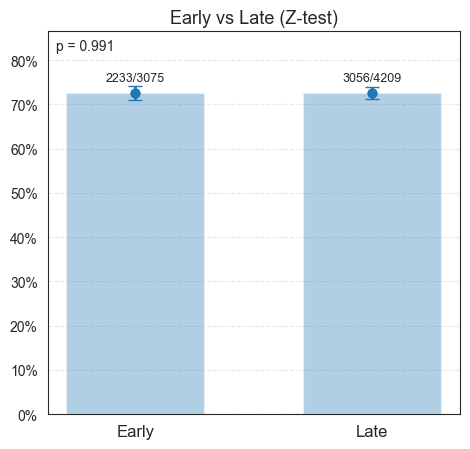

In [50]:
df_monkey = tm.combd_pattern_frequencies[tm.combd_pattern_frequencies['monkey'] == 'Bruno']

#for event in df_monkey['item'].unique():
# for event in ['miss_over_attempt', 'first_shot_capture_over_attempt', 'retry_over_miss', 'retry_fail_over_miss', 'retry_capture_over_miss']:
for event in ['GUAT_over_both', 'TAFT_over_both']:
# for event in ['stop_success_rate', 'ff_capture_rate']:
    print('--------------------------------')
    print(f'Event: {event}')
    try:
        analyze_proportion_trend.show_event_proportion(df_monkey, event)
    except:
        print(f"Error for event: {event}")

# Retry window capture

## just retry window

In [ ]:
exists_ok = True



summary_df = pd.DataFrame()

combd_retry_window_captures = pd.DataFrame()
po_dict = {}

for monkey_name in ['monkey_Bruno', 'monkey_Schro']:
    
    monkey = monkey_name.split("monkey_")[1]
    file_dir = f'all_monkey_data/learning/{monkey_name}'
    os.makedirs(file_dir, exist_ok=True)
    try:
        if not exists_ok:
            raise Exception('')
        all_retries_df = pd.read_csv(f'{file_dir}/all_retries_df.csv', index_col=False)
    except:
        all_retries_df = prep_retry_data.get_retries_data_across_sessions(monkey_name=monkey_name)
        all_retries_df.to_csv(f'{file_dir}/all_retries_df.csv', index=False)
        
    retries_summary = prep_retry_data.summarize_retry_data(all_retries_df)
    retry_window_captures = all_retries_df[all_retries_df['type'].isin(['GUAT', 'TAFT'])].copy()
    retry_window_captures = retry_window_captures[['session', 'capture', 'stop_window']].groupby('session').sum().reset_index(drop=False)
    retry_window_captures.rename(columns={'capture': 'captures', 'stop_window': 'total_duration'}, inplace=True)


    po = capture_stats_trend.fit_poisson_by_session(retry_window_captures)
    po_dict[monkey] = po
    
    retry_window_captures['monkey'] = monkey
    combd_retry_window_captures = pd.concat([combd_retry_window_captures, retry_window_captures])

capture_stats_trend.plot_poisson_rate_fit(combd_retry_window_captures, po_dict)



all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0219/ff_dataframe.h5
Retrieved stop_category_df
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0220
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0220/ff_dataframe.h5
Retrieved stop_category_df
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0221
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/m

AssertionError: duplicated new_trial_index found

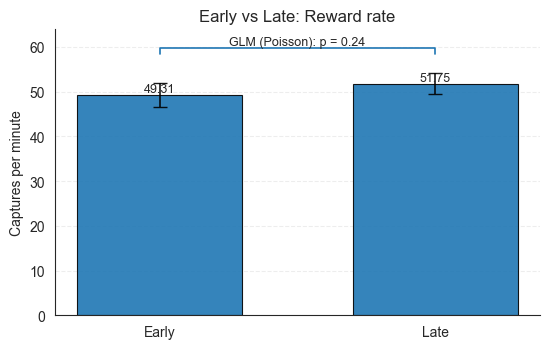

In [ ]:
retry_window_captures = combd_retry_window_captures[combd_retry_window_captures['monkey'] == 'Bruno']

(rate_phase_tbl, rate_ttest_tbl, rate_glm_tbl, rate_effect_summary_tbl
     ) = capture_stats_by_phase.summarize_early_late_event_rate_with_glm(retry_window_captures)


## combine with overall

In [ ]:
summary_df = pd.DataFrame()

combd_df_sessions = pd.DataFrame()
combd_df_trials = pd.DataFrame()
combd_retry_window_captures = pd.DataFrame()
po_dict = {}
po_retry_dict = {}
ols_dict = {}

for monkey_name in ['monkey_Bruno', 'monkey_Schro']:
    
    monkey = monkey_name.split("monkey_")[1]
    all_trial_durations_df, all_stop_df, all_VBLO_df = prep_learning_data.get_key_learning_data(monkey_name=monkey_name)
    try:
        if not exists_ok:
            raise Exception('')
        all_retries_df = pd.read_csv(f'{monkey_name}/all_retries_df.csv', index_col=False)
    except:
        all_retries_df = prep_retry_data.get_retries_data_across_sessions(monkey_name=monkey_name)
        os.makedirs(f'{monkey_name}', exist_ok=True)
        all_retries_df.to_csv(f'{monkey_name}/all_retries_df.csv', index=False)
        
    df_trials, df_sessions = prep_learning_data.process_all_trial_durations_df(all_trial_durations_df)
    po = capture_stats_trend.fit_poisson_by_session(df_sessions)
    df_sessions['monkey'] = monkey
    combd_df_sessions = pd.concat([combd_df_sessions, df_sessions])
    po_dict[monkey] = po


    retry_window_captures = prep_retry_data.get_retry_window_captures(all_retries_df)
    po_retry = capture_stats_trend.fit_poisson_by_session(retry_window_captures)
    po_retry_dict[monkey] = po_retry
    retry_window_captures['monkey'] = monkey
    combd_retry_window_captures = pd.concat([combd_retry_window_captures, retry_window_captures])


combd_df_sessions['condition'] = 'captures_per_min_overall'
combd_retry_window_captures['condition'] = 'captures_per_min_in_retry_window'
combd_captures = pd.concat([combd_df_sessions, combd_retry_window_captures])

combd_po = {}
for monkey in ['Bruno', 'Schro']:
    combd_po[monkey] = {'captures_per_min_overall': po_dict[monkey]}
    combd_po[monkey].update({'captures_per_min_in_retry_window': po_retry_dict[monkey]})
    
capture_stats_trend.plot_poisson_rate_fit(combd_captures, combd_po)

## median duration now (if prior type is XXX)

In [ ]:
all_retries_df['prior_type'] = all_retries_df['type'].shift(1)

In [ ]:
import numpy as np

def geometric_mean(x, axis=None):
    x = np.asarray(x, dtype=float)
    if np.any(x < 0):
        raise ValueError("Geometric mean is undefined for negative values.")
    with np.errstate(divide='ignore'):
        logs = np.log(x)
    gm = np.exp(np.mean(logs, axis=axis))
    return gm


In [ ]:
print('geometric mean: ', geometric_mean(all_retries_df['new_duration'].clip(lower=1e-6)))
all_retries_df['new_duration'].describe()

geometric mean:  1.6364848847366646


count   11584.00000
mean        4.45509
std         3.82705
min         0.00000
25%         2.14136
50%         3.45280
75%         5.69360
max        29.82965
Name: new_duration, dtype: float64

In [ ]:
all_retries_df.shape

(11584, 11)

In [ ]:
all_retries_df

new_trial_index  new_duration  stop_window  type  old_trial_index  \
0                    1       1.62689      0.00000  rest          1.00000   
1                    2      11.25435      1.46067  TAFT          2.00000   
2                    3      13.01428      0.00000  rest          3.00000   
3                    4       8.63187      0.00000  rest          4.00000   
4                    5       1.41089      0.00000  rest          5.00000   
...                ...           ...          ...   ...              ...   
11579              535       3.81796      0.00000  rest        479.00000   
11580              536       5.52784      1.09574  TAFT        480.00000   
11581              537       9.82700      0.00000  rest        481.00000   
11582              538       2.75560      1.01260  TAFT        482.00000   
11583              539       2.53984      0.00000  rest        483.00000   

       old_miss_index type_combined  capture  data_name  session prior_type  
0                 NaN          rest        1  data_0316        0       None  
1                 NaN          both        1  data_0316        0       rest  
2                 NaN          rest        1  data_0316        0       TAFT  
3                 NaN          rest        1  data_0316        0       rest  
4                 NaN          rest        1  data_0316        0       rest  
...               ...           ...      ...        ...      ...        ...  
11579             NaN          rest        1  data_0424       21       TAFT  
11580             NaN          both        1  data_0424       21       rest  
11581             NaN          rest        1  data_0424       21       TAFT  
11582             NaN          both        1  data_0424       21       rest  
11583             NaN          rest        1  data_0424       21       TAFT  

[11584 rows x 11 columns]

In [ ]:
all_retries_df[all_retries_df['new_duration'] > 30]

Empty DataFrame
Columns: [new_trial_index, new_duration, stop_window, type, old_trial_index, old_miss_index, type_combined, capture, data_name, session, prior_type]
Index: []

In [ ]:
all_retries_sub = all_retries_df[all_retries_df['prior_type']=='TAFT'].copy()
print('geometric mean: ', geometric_mean(all_retries_sub['new_duration'].clip(lower=1e-6)))
all_retries_sub['new_duration'].describe()

geometric mean:  1.537372610881318


count   2027.00000
mean       4.07069
std        3.15613
min        0.00000
25%        2.20772
50%        3.38637
75%        5.21234
max       28.48522
Name: new_duration, dtype: float64

In [ ]:
# all_retries_sub = all_retries_df[all_retries_df['prior_type']=='GUAT'].copy()
all_retries_sub = all_retries_df[(all_retries_df['prior_type']=='GUAT') & (all_retries_df['type']!='GUAT')].copy()
print('geometric mean: ', geometric_mean(all_retries_sub['new_duration'].clip(lower=1e-6)))
all_retries_sub['new_duration'].describe()

geometric mean:  3.794000329564227


count   782.00000
mean      4.98597
std       4.02086
min       0.00000
25%       2.32404
50%       3.85123
75%       6.33273
max      29.18234
Name: new_duration, dtype: float64

In [ ]:
all_retries_sub = all_retries_df[all_retries_df['prior_type']=='GUAT'].copy()
all_retries_sub['new_duration'].mean()

np.float64(5.042172704367299)

In [ ]:
all_retries_sub['type'].value_counts()

type
rest    604
TAFT    178
GUAT    111
Name: count, dtype: int64

# Duration / capture rate (as continuous var & event rate)

## both monkeys

In [ ]:
summary_df = pd.DataFrame()

combd_df_sessions = pd.DataFrame()
combd_df_trials = pd.DataFrame()
po_dict = {}
ols_dict = {}

for monkey_name in ['monkey_Bruno', 'monkey_Schro']:
    
    monkey = monkey_name.split("monkey_")[1]
    all_trial_durations_df, all_stop_df, all_VBLO_df = prep_learning_data.get_key_learning_data(monkey_name=monkey_name)
    df_trials, df_sessions = prep_learning_data.process_all_trial_durations_df(all_trial_durations_df)
    
    out = capture_stats_trend.fit_and_plot_capture_rate_and_duration(
        df_trials, df_sessions,
        session_col="session",
        value_col="duration_sec",
        count_col="captures",
        exposure_col="total_duration",
        rate_per="minute",     # or "second"
        make_plots=False,
        title_prefix=f'{monkey}: '
    )
    po  = out["po"]
    ols = out["ols"]
    
    df_sessions['monkey'] = monkey
    df_trials['monkey'] = monkey
    combd_df_sessions = pd.concat([combd_df_sessions, df_sessions])
    combd_df_trials = pd.concat([combd_df_trials, df_trials])
    po_dict[monkey] = po
    ols_dict[monkey] = ols

    po_df = capture_stats_trend.extract_estimates_from_poisson_fit(po)
    ols_df = capture_stats_trend.extract_estimates_from_ols_fit(ols)
    
    po_df['monkey'] = monkey
    ols_df['monkey'] = monkey

    # Combine into one table
    summary_df = pd.concat([summary_df, po_df, ols_df])

capture_stats_trend.plot_poisson_rate_fit(combd_df_sessions, po_dict)
capture_stats_trend.plot_duration_fit(combd_df_trials, ols_dict)

summary_df

model %change_per_session %change_per_10_sessions  \
0  Poisson (captures/min)                0.49                     5.0   
0      OLS (log-duration)               -0.82                    -7.9   
0  Poisson (captures/min)                2.17                    24.0   
0      OLS (log-duration)               -1.31                   -12.4   

  95%_CI_per_10_sessions  p_value                       scale monkey  
0            (2.1, 8.05)  0.00070      percent change in rate  Bruno  
0        (-13.56, -1.93)  0.01030  percent change in duration  Bruno  
0          (18.2, 30.01)  0.00000      percent change in rate  Schro  
0        (-20.19, -3.84)  0.00540  percent change in duration  Schro

In [ ]:
sum_df = summary_df[summary_df['model'] == 'OLS (log-duration)'].copy()
sum_df = sum_df[['monkey'] + [c for c in sum_df.columns if c != 'monkey']]
sum_df.drop(columns=['model', 'scale'], inplace=True)
sum_df

monkey %change_per_session %change_per_10_sessions 95%_CI_per_10_sessions  \
0  Bruno               -0.82                    -7.9        (-13.56, -1.93)   
0  Schro               -1.31                   -12.4        (-20.19, -3.84)   

   p_value  
0  0.01030  
0  0.00540

In [ ]:
sum_df = summary_df[summary_df['model'] == 'Poisson (captures/min)'].copy()
sum_df = sum_df[['monkey'] + [c for c in sum_df.columns if c != 'monkey']]
sum_df.drop(columns=['model', 'scale'], inplace=True)
sum_df

monkey %change_per_session %change_per_10_sessions 95%_CI_per_10_sessions  \
0  Bruno                0.49                     5.0            (2.1, 8.05)   
0  Schro                2.17                    24.0          (18.2, 30.01)   

   p_value  
0  0.00070  
0  0.00000

## early vs late

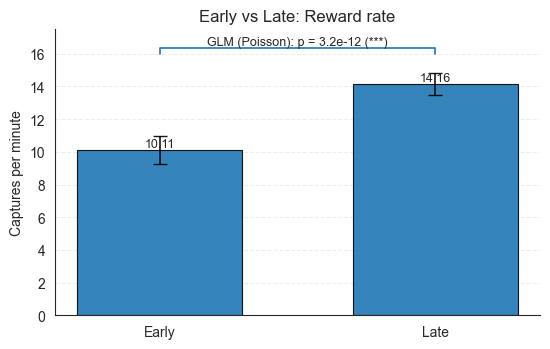

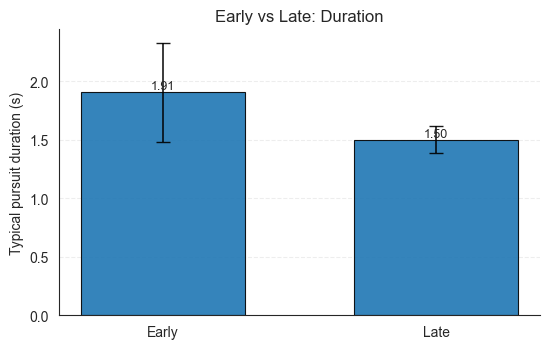

(   phase  n  rate_per_min_mean      se  rate_per_min_lo  rate_per_min_hi
 0  early  7           10.10698 0.44468          9.23542         10.97854
 1   late  8           14.15760 0.33818         13.49477         14.82043,
         contrast  diff_rate_per_min  rate_ratio_late_over_early  \
 0  late_vs_early            4.05062                     1.40077   
 
    percent_change_late_vs_early  t_stat    pval  
 0                      40.07744 7.25060 0.00001  ,
         contrast  rate_ratio_GLMPoisson  RR_95CI_low  RR_95CI_high    pval
 0  late_vs_early                1.37912      1.25991       1.50961 0.00000,
              metric  descriptive_ratio_late_over_early  \
 0  captures_per_min                            1.40077   
 
    descriptive_percent_change  ttest_pval  GLM_rate_ratio        GLM_95CI  \
 0                    40.07744     0.00001         1.37912  [1.260, 1.510]   
 
    GLM_pval  
 0   0.00000  ,
    phase  n  geomT_mean      se  geomT_lo  geomT_hi
 0  early  7     1.90

In [ ]:
capture_stats_by_phase.analyze_early_late_capture_and_duration(df_sessions, df_trials)

## one monkey

In [ ]:
df_trials, df_sessions = prep_learning_data.process_all_trial_durations_df(all_trial_durations_df)

# Fit both + make the same plots you were making before
out = capture_stats_trend.fit_and_plot_capture_rate_and_duration(
    df_trials, df_sessions,
    session_col="session",
    value_col="duration_sec",
    count_col="captures",
    exposure_col="total_duration",
    rate_per="minute",     # or "second"
    make_plots=True,
    title_prefix=f'{monkey_name.split("monkey_")[1]}: '
)
po  = out["po"]
ols = out["ols"]

# # If you just want the models (no plots):
# models = fit_both_models(df_trials, df_sessions)
# po2, ols2 = models["po"], models["ols"]

po_df = capture_stats_trend.extract_estimates_from_poisson_fit(po)
ols_df = capture_stats_trend.extract_estimates_from_ols_fit(ols)

# Combine into one table
summary_df = pd.concat([po_df, ols_df])
summary_df


model %change_per_session %change_per_10_sessions  \
0  Poisson (captures/min)                2.17                    24.0   
0      OLS (log-duration)               -1.31                   -12.4   

  95%_CI_per_10_sessions  p_value                       scale  
0          (18.2, 30.01)  0.00000      percent change in rate  
0        (-20.19, -3.84)  0.00540  percent change in duration

## pretty print results

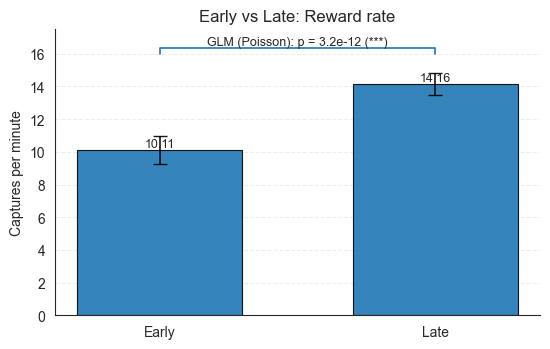

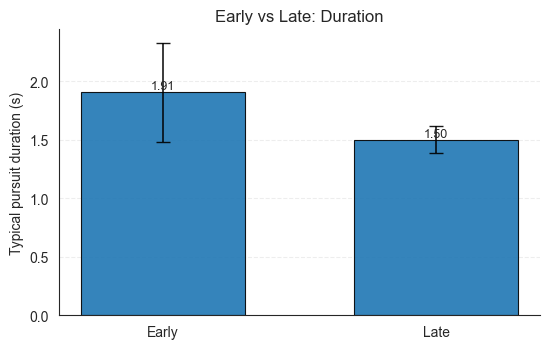

In [ ]:
(rate_phase, rate_ttest, rate_glm, rate_effect) = capture_stats_by_phase.summarize_early_late_event_rate_with_glm(df_sessions)
(dur_phase,  dur_ttest,  dur_glm,  dur_effect ) = capture_stats_by_phase.summarize_early_late_duration_with_glm(df_trials, df_sessions)
print_fit_results.show_all_pretty_tables(rate_phase, rate_ttest, rate_glm, rate_effect,
                       dur_phase,  dur_ttest,  dur_glm,  dur_effect)

## choose duration cutoff

In [ ]:
import numpy as np
import pandas as pd

def outlier_cutoff(durations, method='logmad', k=3.5, iqr_k=3.0, q=0.995):
    """
    One-sided high cutoff for durations. Returns (cutoff, mask).
    - Zeros are never 'too large' and are included in the mask.
    - Negatives raise (shouldn't exist for durations).
    """
    x = np.asarray(durations, float)
    if np.any(x < 0):
        raise ValueError("Durations must be >= 0.")

    pos = x[x > 0]  # ignore zeros for cutoff calc
    if pos.size == 0:
        return np.inf, np.ones_like(x, dtype=bool)

    if method == 'logmad':
        g = np.log(pos)
        med = np.median(g)
        mad = np.median(np.abs(g - med))
        mad_normal = 1.4826 * mad
        cutoff = np.exp(med + k * mad_normal)
    elif method == 'iqr':
        q1, q3 = np.percentile(pos, [25, 75])
        iqr = q3 - q1
        cutoff = q3 + iqr_k * iqr
    elif method == 'quantile':
        cutoff = np.quantile(pos, q)
    else:
        raise ValueError("method must be 'logmad', 'iqr', or 'quantile'.")

    mask = x <= cutoff
    return float(cutoff), mask

for method in ['logmad', 'iqr', 'quantile']:
    cutoff, mask = general_utils.outlier_cutoff(all_trial_durations_df['duration_sec'], method=method)
    print(f'{method}: {cutoff}')
    
cutoff, mask = general_utils.outlier_cutoff(all_trial_durations_df['duration_sec'], method='quantile', q=0.99)
print(f'quantile 0.99: {cutoff}')    

logmad: 55.57154011411868
iqr: 19.338778999999477
quantile: 51.18675949999998
quantile 0.99: 31.887912600000103


# VBLO (as proportion)

In [ ]:
reload(analyze_proportion_trend)

<module 'pattern_discovery.learning.proportion_trend.analyze_proportion_trend' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/pattern_discovery/learning/proportion_trend/analyze_proportion_trend.py'>

In [ ]:
event_count_col = "VBLO_trials"
denom_count_col = "base_trials"
ylabel='Percentage'

ratio_po_dict = {}
combd_df_VBLO = pd.DataFrame()

for monkey_name in ['monkey_Schro', 'monkey_Bruno']:
    monkey = monkey_name.split("monkey_")[1]
    all_trial_durations_df, all_stop_df, all_VBLO_df = prep_learning_data.get_key_learning_data(monkey_name=monkey_name)
    glm_pois = smf.glm(
        f"{event_count_col} ~ session",
        data=all_VBLO_df,
        family=sm.families.Poisson(),
        offset=np.log(all_VBLO_df[denom_count_col].clip(
            lower=1))  # keep your offset guard
    ).fit(cov_type="HC0")
    
    
    all_VBLO_df['monkey'] = monkey
    combd_df_VBLO = pd.concat([combd_df_VBLO, all_VBLO_df])
    ratio_po_dict[monkey] = glm_pois

title = f'Fraction of Targets Visible Before Last Capture'
analyze_proportion_trend.plot_poisson_proportion_fit(
        combd_df_VBLO, ratio_po_dict,
        session_col="session", event_count_col=event_count_col, denom_count_col=denom_count_col,
        title=title, ylabel=ylabel,
        pval=None
    )
    
# analyze_proportion_trend.evaluate_proportion_trend(all_VBLO_df, event_count_col=event_count_col, denom_count_col=denom_count_col,
#                                         title=title, ylabel=ylabel)

     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.06300 0.01152 5.46817 0.00000                     1.87766   

           95% CI  
0  [1.498, 2.353]  



--- Early vs Late Results ---
phase  VBLO_trials  base_trials   p_hat    p_lo    p_hi
early           31         2524 0.01228 0.00867 0.01738
 late          125         3919 0.03190 0.02684 0.03787


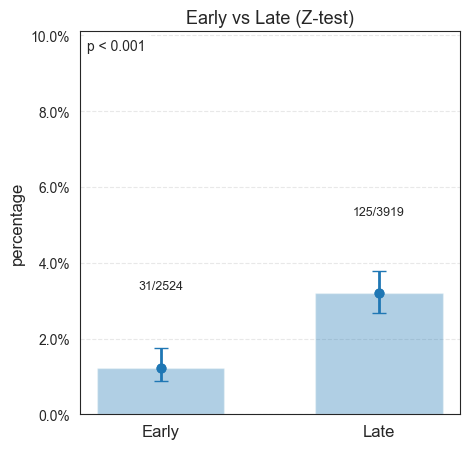

     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.01431 0.00539 2.65338 0.00797                     1.15386   

           95% CI  
0  [1.038, 1.283]  



--- Early vs Late Results ---
phase  VBLO_trials  base_trials   p_hat    p_lo    p_hi
early          315         7140 0.04412 0.03959 0.04913
 late          566         9851 0.05746 0.05303 0.06223


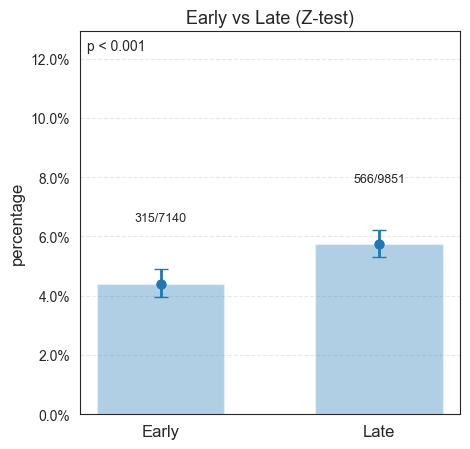

In [ ]:
event_count_col = "VBLO_trials"
denom_count_col = "base_trials"
ylabel='percentage'

for monkey_name in ['monkey_Schro', 'monkey_Bruno']:
    all_trial_durations_df, all_stop_df, all_VBLO_df = prep_learning_data.get_key_learning_data(monkey_name=monkey_name)
    title = f'{monkey_name.split("monkey_")[1]}: Fraction of Targets Visible Before Previous Capture'
    analyze_proportion_trend.evaluate_proportion_trend(all_VBLO_df, event_count_col=event_count_col, denom_count_col=denom_count_col,
                                            title=title, ylabel=ylabel)

In [ ]:
event_count_col = "VBLO_trials"
denom_count_col = "base_trials"
title = f'{monkey_name.split("monkey_")[1]}: Percentage of Visible-Before-Last-Target Trials'
ylabel="Ratio"

analyze_proportion_trend.evaluate_proportion_trend(all_VBLO_df, event_count_col=event_count_col, denom_count_col=denom_count_col, title=title, ylabel=ylabel)


     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.01431 0.00539 2.65338 0.00797                     1.15386   

           95% CI  
0  [1.038, 1.283]  



--- Early vs Late Results ---
phase  VBLO_trials  base_trials   p_hat    p_lo    p_hi
early          315         7140 0.04412 0.03959 0.04913
 late          566         9851 0.05746 0.05303 0.06223


# Captures over stops (as proportion)

     model    coef      se       z    pval  rate_ratio_per_10_sessions  \
0  Poisson 0.01133 0.00323 3.50464 0.00046                     1.11994   

           95% CI  
0  [1.051, 1.193]  



--- Early vs Late Results ---
phase  captures  stops   p_hat    p_lo    p_hi
early      2845   7638 0.37248 0.36170 0.38338
 late      4353   9805 0.44396 0.43415 0.45381


     model     coef      se        z    pval  rate_ratio_per_10_sessions  \
0  Poisson -0.00140 0.00135 -1.03601 0.30020                     0.98610   

           95% CI  
0  [0.960, 1.013]  



--- Early vs Late Results ---
phase  captures  stops   p_hat    p_lo    p_hi
early      7769  15527 0.50035 0.49249 0.50822
 late     10775  21926 0.49143 0.48481 0.49804


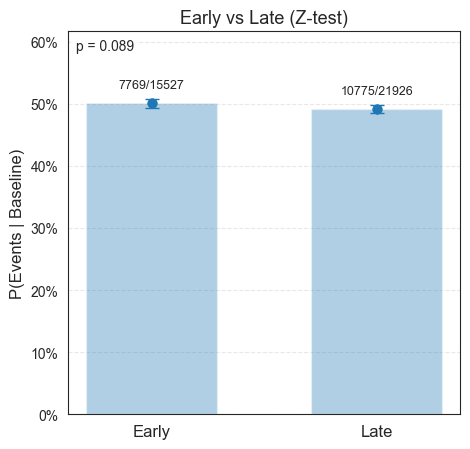

In [ ]:
event_count_col = "captures"
denom_count_col = "stops"

sns.set_style(style="darkgrid")
for monkey_name in ['monkey_Schro', 'monkey_Bruno']:
    all_trial_durations_df, all_stop_df, all_VBLO_df = prep_learning_data.get_key_learning_data(monkey_name=monkey_name)
    analyze_proportion_trend.evaluate_proportion_trend(all_stop_df, event_count_col=event_count_col, denom_count_col=denom_count_col,
                                            title=f'{monkey_name.split("monkey_")[1]}: Ratio of Captures vs Stops')

# Appendix

## Manually get capture vs miss

In [ ]:
captures_df = df_monkey.loc[df_monkey['item'] == 'ff_capture_rate', ['session', 'frequency', 'monkey']].rename(columns={'frequency': 'n_capture'})
misses_df = df_monkey.loc[df_monkey['item'] == 'retry_capture_over_miss', ['session', 'denom_count', 'monkey']].rename(columns={'denom_count': 'n_miss'})

outcomes_df = pd.merge(captures_df, misses_df, on=['session', 'monkey'], how='outer')
outcomes_df['denom_count'] = outcomes_df['n_capture'] + outcomes_df['n_miss']
outcomes_df['capture'] = outcomes_df['n_capture'] / outcomes_df['denom_count']
outcomes_df['miss'] = outcomes_df['n_miss'] / outcomes_df['denom_count']
outcomes_df.head(3)


session  n_capture monkey    n_miss  denom_count  capture    miss
0        0        377  Schro 242.00000    619.00000  0.60905 0.39095
1        1        393  Schro 235.00000    628.00000  0.62580 0.37420
2        2        199  Schro 133.00000    332.00000  0.59940 0.40060

In [ ]:
long = outcomes_df.melt(
    id_vars=['session', 'monkey' , 'denom_count'],         # keep session as-is
    value_vars=['n_capture','n_miss'],  # columns to unpivot
    var_name='label',        # new column name
    value_name='frequency'         # new values column name
)

long['ratio'] = long['frequency'] / long['denom_count']

fig = px.bar(
    long,
    x='session',
    y='ratio',
    color='label',
    title='Outcome (stacked)',
)
fig.show()

In [ ]:
ses = analyze_proportion_trend.tertile_phase(long)
phase_df = ses.groupby(['phase', 'label', 'monkey'], observed=True)[['frequency', 'denom_count']].sum().reset_index(drop=False)
phase_df['ratio'] = phase_df['frequency'] / phase_df['denom_count']
phase_df

fig = px.bar(
    phase_df,
    x='phase',
    y='ratio',
    color='label',
    title='Attempts by session (stacked)',
)
fig.show()

## Plotly for stacked bars

In [ ]:
#categories = ['retry_fail_over_miss', 'retry_capture_over_miss', 'no_retry_over_miss', 'first_shot_capture_over_attempt']
# #categories = ['miss_over_attempt', 'first_shot_capture_over_attempt']
categories = ['retry_fail_over_attempt', 'retry_capture_over_attempt', 'no_retry_over_attempt', 'first_shot_capture_over_attempt']

new_label_mapping = {
    # Break down attempts
    'first_shot_capture_over_attempt': 'Capture',
    'no_retry_over_attempt': 'No Retry',
    'retry_capture_over_attempt': 'Retry + Capture',
    'retry_fail_over_attempt': 'Retry + Fail',
    # Capture vs miss
    'capture_over_miss': 'Capture',
    'miss_over_attempt': 'Miss',
    # Break down misses
    'retry_capture_over_miss': 'Retry + Capture over Miss',
    'retry_fail_over_miss': 'Retry + Fail over Miss',
    'no_retry_over_miss': 'No Retry over Miss',
    
}

# category_order = ['Capture', 'Retry + Capture', 'Retry + Fail', 'No Retry']
category_order = ['Capture', 'Miss']
category_order = ['Retry + Capture over Miss', 'Retry + Fail over Miss', 'No Retry over Miss']


for monkey in ['Bruno', 'Schro']:
    df_monkey = tm.combd_pattern_frequencies[tm.combd_pattern_frequencies['monkey'] == monkey].copy()
    df_monkey['new_label'] = df_monkey['item'].map(new_label_mapping).fillna('')
    df_monkey_sub = df_monkey[df_monkey['new_label'].isin(category_order)].copy()
    

    ses = analyze_proportion_trend.tertile_phase(df_monkey_sub)
    phase_df = ses.groupby(['phase', 'new_label', 'item'], observed=True)[['frequency', 'denom_count']].sum().reset_index(drop=False)
    phase_df['denom_count'] = phase_df['denom_count'].astype(int)
    phase_df['ratio'] = phase_df['frequency'] / phase_df['denom_count']

    p_values = {}
    for new_label in category_order: 
        phase_df_sub = phase_df[phase_df['new_label']==new_label]
        pval_el, test_name = analyze_proportion_trend.test_early_late(phase_df_sub, new_label)
        print(f'{new_label}: {round(pval_el, 5)}')
        p_values[new_label] = pval_el


    phase_df_sub = phase_df[phase_df['phase'].isin(['early', 'late'])].copy()
    

    fig = px.bar(
        phase_df_sub,
        x='phase',
        y='ratio',
        color='new_label',
        title=f'{monkey}: Attempt Outcomes Across Early and Late Sessions',
        category_orders={
            'phase': ['early', 'late'],
            'new_label': ['Capture', 'Retry + Capture', 'Retry + Fail', 'No Retry']
        },
        # >>> INSERT FIXES HERE (exact code above) <<<
        color_discrete_map={
            'Capture': px.colors.qualitative.Plotly[0],
            'Retry + Capture': px.colors.qualitative.Plotly[1],
            'Retry + Fail': px.colors.qualitative.Plotly[2],
            'No Retry': px.colors.qualitative.Plotly[3],
        }
    )

    fig.update_layout(
        width=620,
        height=520,
        bargap=0.18,
        bargroupgap=0.05,
        barmode='relative',          # stacked
        legend_traceorder='reversed',# legend top matches stack top; use 'normal' to flip
        legend_title_text='',
        legend=dict(x=1.02, y=0.5, yanchor='middle'),  # keep to the right, centered
        yaxis=dict(title='Proportion of Attempts',tickformat='.0%'),
        xaxis_title='Session Phase',
        margin=dict(l=90, r=140, t=70, b=60),
    )

    # Thin white borders between stack segments → clearer separation
    fig.update_traces(marker_line_width=0.6, marker_line_color='white')

    # Cleaner hover text
    fig.update_traces(
        hovertemplate=(
            'phase=%{x}<br>'
            '%{fullData.name}: %{y:.1%}<extra></extra>'
        )
    )

    fig.update_yaxes(rangemode='tozero', automargin=True)
    fig.show()


Retry + Capture over Miss: 0.00226
Retry + Fail over Miss: 0.17118
No Retry over Miss: 0.0


Retry + Capture over Miss: 0.0
Retry + Fail over Miss: 0.0
No Retry over Miss: 0.0


## Quickly get all_trial_durations_df

In [ ]:
raw_data_dir_name = 'all_monkey_data/raw_monkey_data'
sessions_df_for_one_monkey = combine_info_utils.make_sessions_df_for_one_monkey(
    raw_data_dir_name, 'monkey_Bruno')

all_trial_durations_df = pd.DataFrame()

for index, row in sessions_df_for_one_monkey.iterrows():
    if row['finished'] is True:
        continue

    data_name = row['data_name']
    raw_data_folder_path = os.path.join(
        raw_data_dir_name, row['monkey_name'], data_name)
    print(raw_data_folder_path)
    data_item = further_processing_class.FurtherProcessing(
        raw_data_folder_path=raw_data_folder_path)
    # data_item.retrieve_or_make_monkey_data()
    
    data_item.ff_caught_T_sorted, data_item.ff_index_sorted, data_item.ff_real_position_sorted, data_item.ff_believed_position_sorted, data_item.ff_life_sorted, \
        data_item.ff_flash_end_sorted = retrieve_raw_data.make_or_retrieve_ff_info_from_txt_data(
            data_item.raw_data_folder_path)
    # data_item.make_or_retrieve_closest_stop_to_capture_df()
    # data_item.make_ff_caught_T_new()
    
    trial_durations = np.diff(data_item.ff_caught_T_sorted)
    trial_durations_df = pd.DataFrame(
        {'duration_sec': trial_durations, 'trial_index': np.arange(len(trial_durations))})
    trial_durations_df['data_name'] = data_name
    all_trial_durations_df = pd.concat(
        [all_trial_durations_df, trial_durations_df])
    
all_trial_durations_df = make_variations_utils.assign_session_id(all_trial_durations_df)

all_trial_durations_df = make_variations_utils.assign_session_id(all_trial_durations_df, 'session')


all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0220
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0221
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0222
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0226
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0227
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0228
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0301
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0306
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0307
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0308
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0309
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0314
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0315
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0316
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0321
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0322
all_monkey

## Nonparametric trend checks (and others)
(a) Spearman: session vs geometric‑mean duration per session

In [ ]:
import numpy as np, pandas as pd
from scipy.stats import spearmanr

# geometric mean per session = exp(mean(log T))
g = (
    df_trials
    .assign(logT=np.log(df_trials["duration_sec"]))
    .groupby("session")["logT"]
    .mean()
    .pipe(np.exp)
    .rename("geom_mean_T")
    .reset_index()
)

rho, pval = spearmanr(g["session"].values, g["geom_mean_T"].values)
print(f"Spearman rho = {rho:.3f}, p = {pval:.3g}")


Spearman rho = -0.536, p = 0.0102


## Theil–Sen slope on log T (trial level)

In [ ]:
import numpy as np
from sklearn.linear_model import TheilSenRegressor

X = df_trials[["session"]].astype(float).values
y = np.log(df_trials["duration_sec"].values)

ts = TheilSenRegressor(random_state=0)
ts.fit(X, y)

slope = ts.coef_[0]                    # per session (on log-scale)
per10_pct = (np.exp(10*slope) - 1)*100 # % change per 10 sessions
print(f"Theil–Sen slope (logT vs session) = {slope:.5f} per session "
      f"⇒ {per10_pct:+.1f}% per 10 sessions")


Theil–Sen slope (logT vs session) = -0.01601 per session ⇒ -14.8% per 10 sessions
